# 1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

### 1A. What coefficients do you get? Interpret the meaning of these coefficients. 

### 1A Answer: I got an Intercept of -468.138140 and a Slope of 0.267722. If the slope were zero then the average life expectancy would be -468.138140. This is an extrapolation because the minimum year is 1990, so any values before that would lead to an unreliable bet of predicting life expectancy. The slope represents a positive association between year variable and life expectancy variable. Also, for every one unit increase in year the average life expectancy increases by .267722.

In [4]:
country = pd.read_csv('../data/gdp_le.csv')
country.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


<Axes: xlabel='Year', ylabel='Life_Expectancy'>

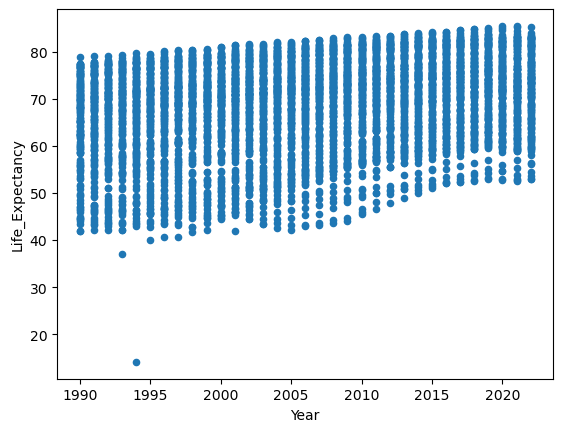

In [5]:
country.plot(kind='scatter', x='Year', y='Life_Expectancy')

In [6]:
lr_life_expectancy = smf.ols("Life_Expectancy ~ Year", data=country).fit()

In [7]:
lr_life_expectancy.params

Intercept   -468.138140
Year           0.267722
dtype: float64

### 1B. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

### 1B Answer: The intercept is 64.6289, and represents the mean average life expectancy, if our predictor variable were 0. Both of their p-values evaluate to 0, so we would reject the null hypothesis and conclude that our predictor variable affects our target variable. The observed effect of year on average life_expectancy is statistically significant. 

In [10]:
lr_life_expectancy = smf.ols('Life_Expectancy ~ I(Year-1990)', data=country).fit()

In [11]:
lr_life_expectancy.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

In [12]:
lr_life_expectancy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Mon, 21 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        22:07:22   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1C. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  

### 1C Answer:  Answer: The actual mean was 69.010% and the predictions mean was 68.912% - the prediction was about one percent over.

In [16]:
pred_df = pd.DataFrame(
    {
        'Year': np.linspace(start=country['Year'].min(), stop=country['Year'].max()) # we are creating a dataframe.
    }
)

pred_df['mean_estimate'] = lr_life_expectancy.predict(pred_df)

pred_df.head(2)

,Year,mean_estimate
0,1990.000000,64.628889
1,1990.653061,64.803728


In [17]:
country['Life_Expectancy'].mean(), pred_df['mean_estimate'].mean()

(69.01011528644356, 68.9124434064843)

### 1D. Plot the actual values against your model's estimates for the mean life expectancy.  

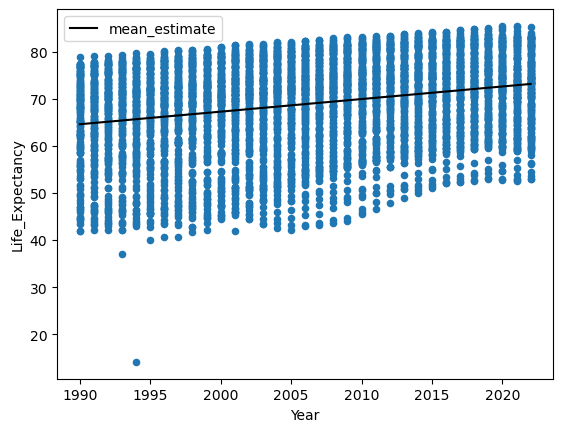

In [18]:
fig, ax = plt.subplots()
country.plot(kind='scatter', x='Year', y='Life_Expectancy', ax=ax)
pred_df.plot(kind='line', x='Year', y='mean_estimate', color='black', ax=ax);

### 1E Inspect the R-squared value for the model. does it make sense, given the plot?   

**1E Answer**:The R2 value is 0.072 which makes sense because the data is stretched far off above and below the least square regression line. I don't even know if you can fit a line to this.

In [49]:
lr_life_expectancy.rsquared

0.07154748843194647

# 2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  

In [65]:
country_2021 = country.loc[country['Year'] == 2021]

In [67]:
country_2021.head(1)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982


In [73]:
lr_life_expectancy_2021 = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data=country_2021).fit()

### 2a. What coefficients do you get? Interpret the meaning of those coefficients. 

**2a Answer:** I get an intercept of 65.949870 and slope of 0.000257. If the slope was 0, then the average life expectancy would be 66. For every 1 unit increase in GDP_Per_Capita we can expect a 0.000257 increase in life expectancy. There is a positive association between the variables.

In [78]:
lr_life_expectancy_2021.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

### 2b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?  


In [120]:
lr_life_expectancy_2021 = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita * 1000)', data=country_2021).fit()

In [122]:
lr_life_expectancy_2021.params

Intercept                   6.594987e+01
I(GDP_Per_Capita * 1000)    2.568917e-07
dtype: float64

### 2c. Are the coefficients statistically significant? 

**Answer** The answer is statistically significant. We can reject the null hypothesis that an increase in GDP_Per_Capita doesn't affect the average Life_Expectancy. There is a positive association between the variables.

In [124]:
lr_life_expectancy_2021.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        01:24:49   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita * 1000)  2.569e-07   1.76e-08     14.608      0.000    2.22e-07    2.92e-07
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                     4.34e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2D What does your model estimate for the mean life expectancy for a country whose gdp per capita is 50,000? What about one whose gdp per capita is 100,000?

**2D Answer:** Models estimate for mean life expectancy: on average a 79 year old life expectancy for 50000 gdp per capita and a 69 year old life expectancy for 100000 gdp per capita. 

In [201]:
pred_df_2021 = pd.DataFrame(
    {
        'GDP_Per_Capita': np.linspace(start=country_2021['GDP_Per_Capita'].min(), stop=country_2021['GDP_Per_Capita'].max())
    }
)
pred_df_2021['mean_estimate_2021'] = lr_life_expectancy_2021.predict(pred_df_2021)

In [174]:
pred_df_2021.loc[pred_df_2021['GDP_Per_Capita'] >= 50000].nsmallest(1, 'GDP_Per_Capita')

,GDP_Per_Capita,mean_estimate_2021
22,52332.993119,79.393784


In [176]:
pred_df_2021.loc[pred_df_2021['GDP_Per_Capita'] >= 10000].nsmallest(1, 'GDP_Per_Capita')

,GDP_Per_Capita,mean_estimate_2021
4,10099.326059,68.544303


### 2e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

**2e Answer:** The r squared value is .55514. We can explain 55% of the varibility in Life Expectancy by GDP_Per_Capita. 

##### fig, ax = plt.subplots()
country_2021.plot(kind='scatter', x='GDP_Per_Capita', y='Life_Expectancy', ax=ax)
pred_df_2021.plot(kind='line', x='GDP_Per_Capita', y='mean_estimate_2021', color='black', ax=ax)

In [205]:
lr_life_expectancy_2021.rsquared

0.555146054691391